In [13]:
!pip install pandasql

In [1]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandasql as ps

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [14]:
# 1.Age | Objective Feature | age | int (days)
#2.Height | Objective Feature | height | int (cm) |
#3.Weight | Objective Feature | weight | float (kg) |
#4.Gender | Objective Feature | gender | categorical code |120
#5.Systolic blood pressure | Examination Feature | ap_hi | int |80
#6.Diastolic blood pressure | Examination Feature | ap_lo | int |
#7.Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
#8.Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
#9.Smoking | Subjective Feature | smoke | binary |
#10.Alcohol intake | Subjective Feature | alco | binary |
#11.Physical activity | Subjective Feature | active | binary |
#12.Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [2]:
#Step-2
#Load the data
cdata=pd.read_csv(r"C:\Users\Praveen\OneDrive\Desktop\PROJECT\cardio_train.csv",header=0)
#Step -3
#Copy to back_up file
cdata_bk=cdata.copy()
#Display first 5 records
cdata.head()

,id,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
#Deleting Unwanted column
del cdata['id']

In [4]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age(in years)  70000 non-null  int64  
 1   gender         70000 non-null  int64  
 2   height         70000 non-null  int64  
 3   weight         70000 non-null  float64
 4   ap_hi          70000 non-null  int64  
 5   ap_lo          70000 non-null  int64  
 6   cholesterol    70000 non-null  int64  
 7   gluc           70000 non-null  int64  
 8   smoke          70000 non-null  int64  
 9   alco           70000 non-null  int64  
 10  active         70000 non-null  int64  
 11  cardio         70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [5]:
cdata.isnull().sum()

age(in years)    0
gender           0
height           0
weight           0
ap_hi            0
ap_lo            0
cholesterol      0
gluc             0
smoke            0
alco             0
active           0
cardio           0
dtype: int64

# Exploratory Data Analysis (EDA)

In [6]:
#Converting Age to Years
cdata['age(in years)'] /= 365

In [7]:
#Check the duplicate  values with in  dataset if available
cdata_dup=cdata[cdata.duplicated(keep='last')]
cdata_dup

,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1142,47.926027,2,169,74.0,120,80,1,1,0,0,1,1
1204,46.008219,1,165,68.0,120,80,1,1,0,0,1,0
1568,60.123288,1,165,60.0,120,80,1,1,0,0,1,0
1612,55.597260,1,162,70.0,110,70,1,1,0,0,1,0
2305,56.150685,1,165,70.0,120,80,1,1,0,0,1,0
2677,60.484932,1,175,69.0,120,80,1,1,0,0,1,1
6325,39.868493,1,158,64.0,120,80,1,1,0,0,1,0
8190,59.665753,1,160,58.0,120,80,1,1,0,0,1,0
10494,46.402740,2,170,70.0,120,80,1,1,0,0,0,0
10777,52.021918,1,164,65.0,120,80,1,1,0,0,1,0


In [8]:
#Check the duplicate  values with in  dataset if available
cdata = cdata.drop_duplicates()

In [9]:
cdata[cdata.duplicated()]

,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


# Outliers Detection

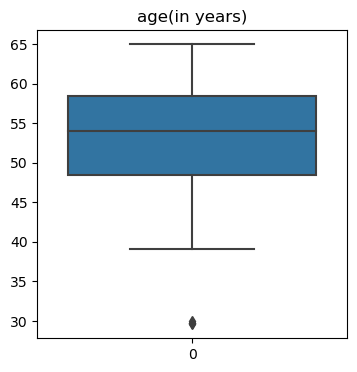

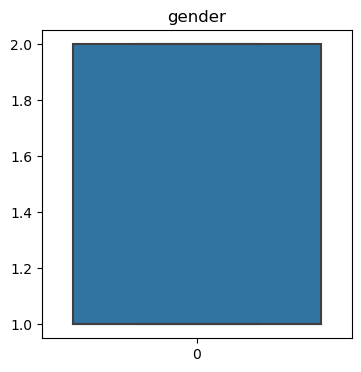

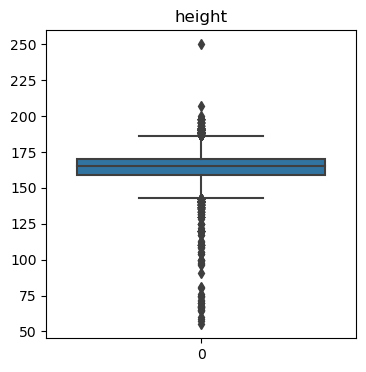

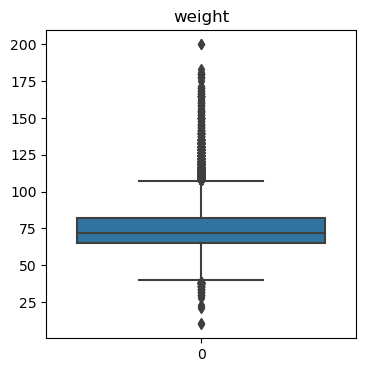

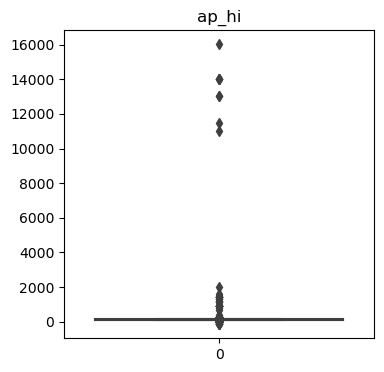

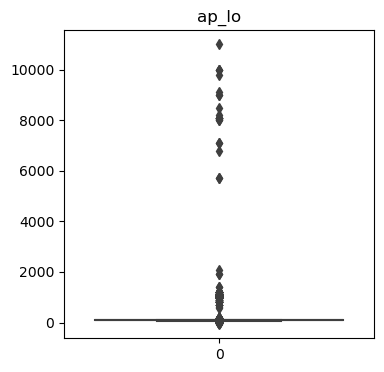

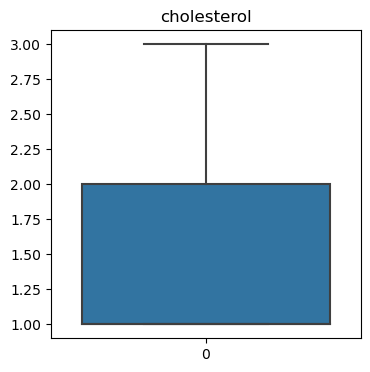

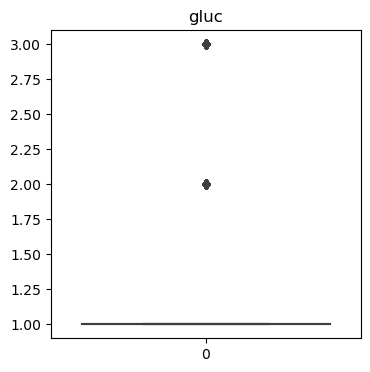

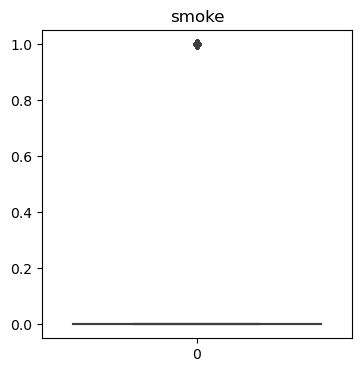

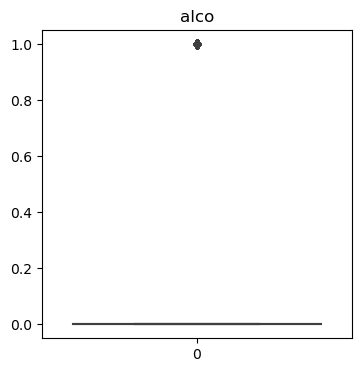

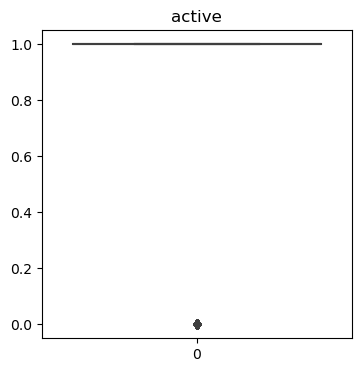

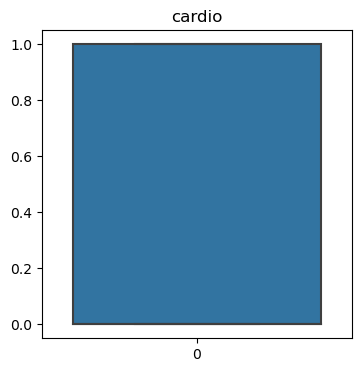

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in cdata.columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(cdata[col])
    plt.title(col)
    plt.show()

In [14]:
def sum_outliers(data):
    Q1 = data.quantile(.25)
    Q3 = data.quantile(.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    return sum((data < lower_bound) | (data > upper_bound))


num_cols = np.array(["age(in years)","height","weight","ap_hi","ap_lo"])
for col in num_cols:
    print(f"{col} : {sum_outliers(cdata[col])}")

age(in years) : 0
height : 0
weight : 307
ap_hi : 0
ap_lo : 0


In [15]:
def remove_outliers(data):
    Q1 = data.quantile(.25)
    Q3 = data.quantile(.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    data_cleaned = data[~((data < lower_bound) | (data > upper_bound))]
    return data_cleaned

cols_outliers = ['age(in years)','height', 'weight', 'ap_hi', 'ap_lo']
for col in cols_outliers:
    cdata[col] = remove_outliers(cdata[col])
    

for col in num_cols:
    print(f"{col} : {sum_outliers(cdata[col])}")

age(in years) : 0
height : 0
weight : 0
ap_hi : 0
ap_lo : 0


In [16]:
cdata.isnull().sum()

age(in years)       4
gender              0
height            519
weight           2126
ap_hi            1435
ap_lo            4632
cholesterol         0
gluc                0
smoke               0
alco                0
active              0
cardio              0
dtype: int64

In [17]:
cdata=cdata.dropna()

In [18]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62215 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age(in years)  62215 non-null  float64
 1   gender         62215 non-null  int64  
 2   height         62215 non-null  float64
 3   weight         62215 non-null  float64
 4   ap_hi          62215 non-null  float64
 5   ap_lo          62215 non-null  float64
 6   cholesterol    62215 non-null  int64  
 7   gluc           62215 non-null  int64  
 8   smoke          62215 non-null  int64  
 9   alco           62215 non-null  int64  
 10  active         62215 non-null  int64  
 11  cardio         62215 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 6.2 MB


In [19]:
cdata.isnull().sum()

age(in years)    0
gender           0
height           0
weight           0
ap_hi            0
ap_lo            0
cholesterol      0
gluc             0
smoke            0
alco             0
active           0
cardio           0
dtype: int64

In [20]:
for col in num_cols:
    print(f"{col} : {sum_outliers(cdata[col])}")

age(in years) : 0
height : 0
weight : 767
ap_hi : 0
ap_lo : 0


In [21]:
print(cdata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62215 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age(in years)  62215 non-null  float64
 1   gender         62215 non-null  int64  
 2   height         62215 non-null  float64
 3   weight         62215 non-null  float64
 4   ap_hi          62215 non-null  float64
 5   ap_lo          62215 non-null  float64
 6   cholesterol    62215 non-null  int64  
 7   gluc           62215 non-null  int64  
 8   smoke          62215 non-null  int64  
 9   alco           62215 non-null  int64  
 10  active         62215 non-null  int64  
 11  cardio         62215 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 6.2 MB
None


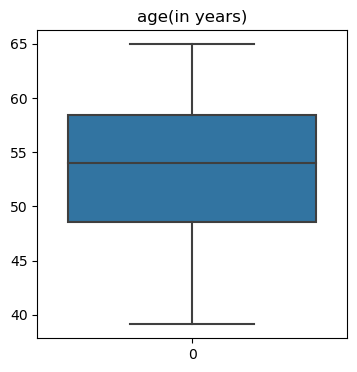

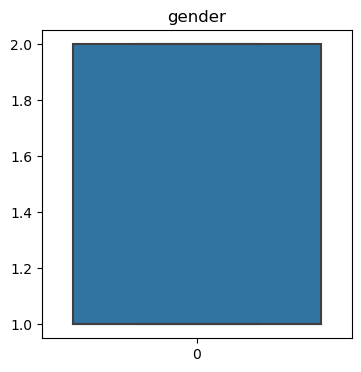

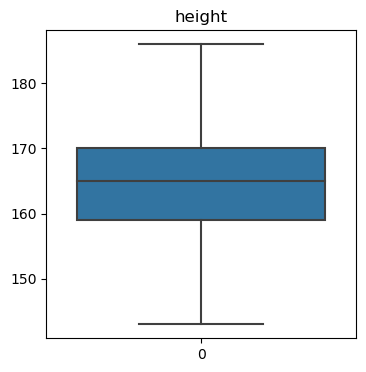

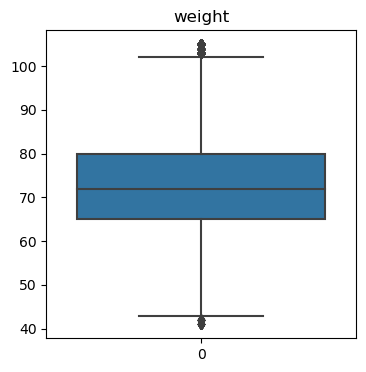

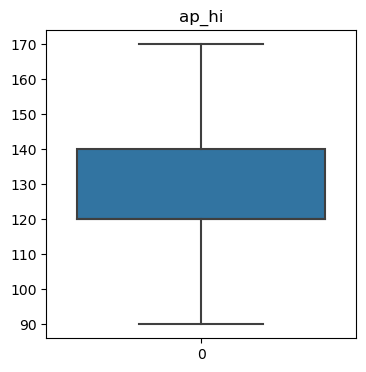

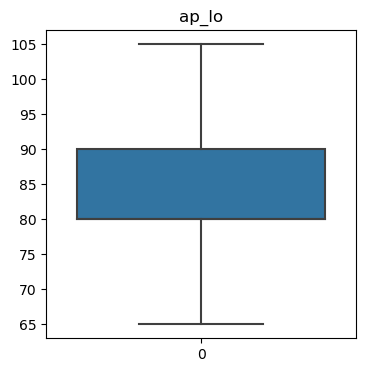

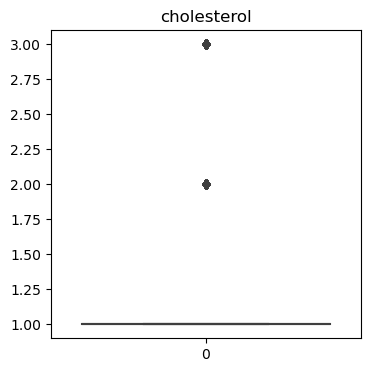

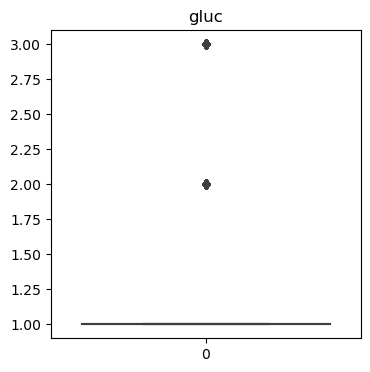

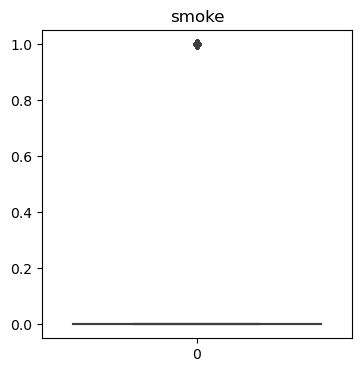

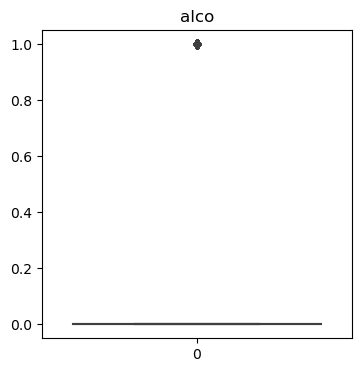

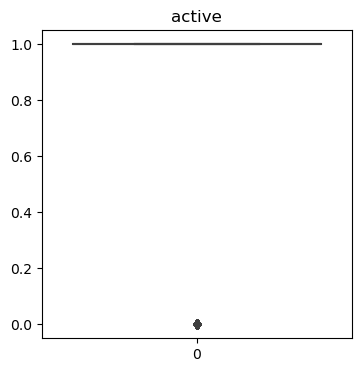

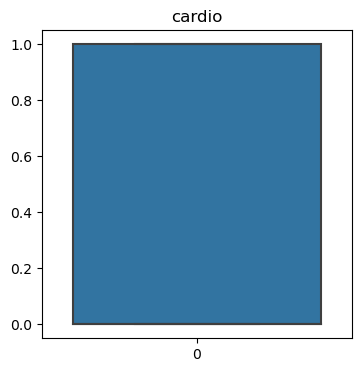

In [22]:
for col in cdata.columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(cdata[col])
    plt.title(col)
    plt.show()

In [34]:
cdata.isnull().sum()

age(in years)    0
gender           0
height           0
weight           0
ap_hi            0
ap_lo            0
cholesterol      0
gluc             0
smoke            0
alco             0
active           0
cardio           0
bmi              0
bmi_category     0
dtype: int64

# Feature Engineering

In [23]:

#1.One way to do this is by calculating the Body Mass Index (BMI) and
#using it to categorize individuals into different BMI categories,
#which can be associated with diabetes risk.
# Calculate BMI
#Higher BMI values are generally associated with an increased risk of diabetes.
#Individualswith obesity (high BMI) are at a higher risk of developing type 2 diabetes.
cdata['bmi'] = cdata['weight'] / ((cdata['height'] / 100) ** 2)

# Define BMI categories
def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to create a new column 'bmi_category'
cdata['bmi_category'] = cdata['bmi'].apply(get_bmi_category)


In [35]:
#2.Calculate pulse pressure
#Pulse pressure is the difference between systolic and diastolic blood pressure.
#It is associated with arterial stiffness and can be a risk factor for cardiovascular diseases,
#including diabetes.
#Elevated pulse pressure may indicate increased cardiovascular risk, which is linked to diabetes.

cdata['pulse_pressure'] = cdata['ap_hi'] - cdata['ap_lo']


In [36]:
#3. Calculate mean arterial pressure (MAP)
#MAP is a measure of the average blood pressure in an individual's arteries during one cardiac cycle.
#It's another indicator of cardiovascular health and can be associated with diabetes risk.

cdata['map'] = cdata['ap_lo'] + 0.33 * (cdata['ap_hi'] - cdata['ap_lo'])


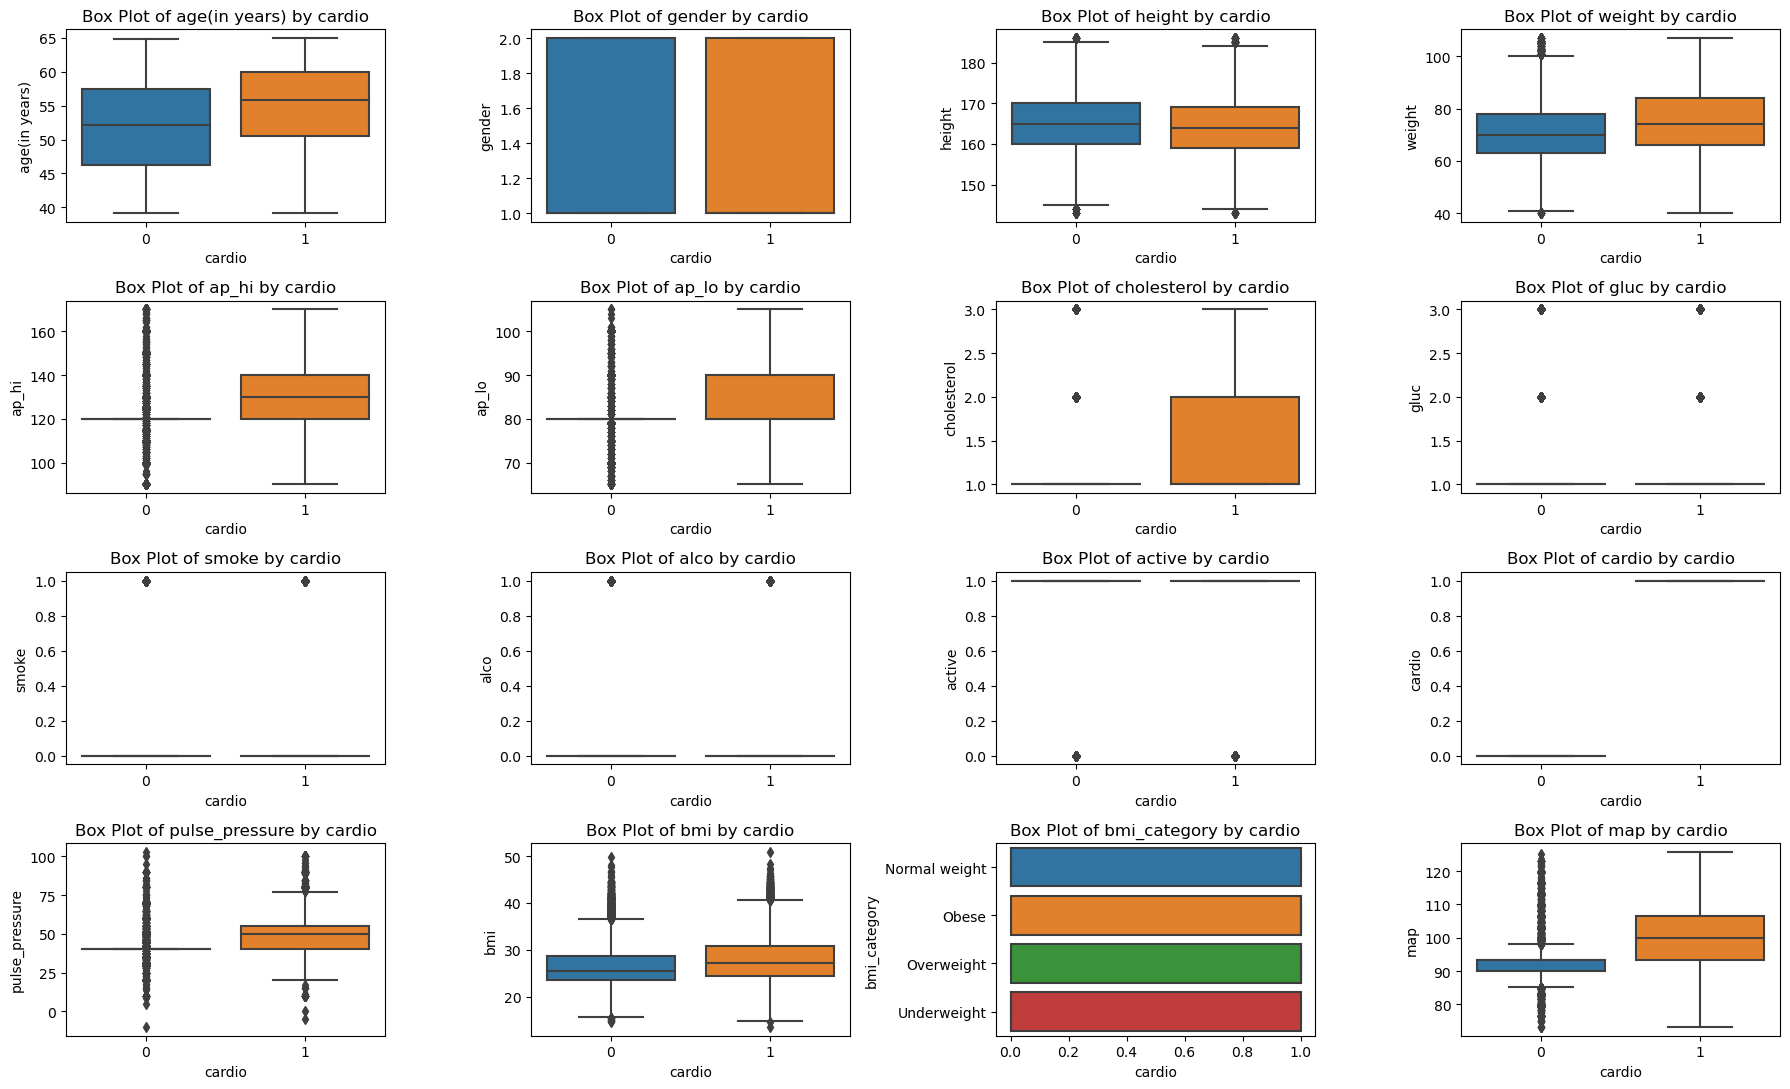

In [37]:
#Outlier detection with target variable
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named 'sdata'
plt.figure(figsize=(18, 11))

numerical_columns=['age(in years)','gender','height','weight','ap_hi','ap_lo','cholesterol',
                   'gluc','smoke','alco','active','cardio','pulse_pressure','bmi','bmi_category','map']

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='cardio', y=col, data=cdata)
    plt.title(f'Box Plot of {col} by cardio')
    plt.xlabel('cardio')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [38]:
cdata.head()

,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,pulse_pressure,map
0,50.391781,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0,21.967120,Normal weight,30.0,89.9
1,55.419178,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1,34.927679,Obese,50.0,106.5
2,51.663014,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1,23.507805,Normal weight,60.0,89.8
3,48.282192,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1,28.710479,Overweight,50.0,116.5
5,60.038356,1,151.0,67.0,120.0,80.0,2,2,0,0,0,0,29.384676,Overweight,40.0,93.2


In [39]:
cdata.cardio.value_counts()

0    31615
1    30863
Name: cardio, dtype: int64

In [40]:
# Count the target or dependent variable by '0' & '1' and their proportion
# (>= 10 : 1, then the dataset is imbalance data)
cardio_count = cdata.cardio.value_counts()
print("proportion:",cardio_count[0]/cardio_count[1],":1")

proportion: 1.0243657453909212 :1


In [41]:
#Step -5
#Display the unique values of the data set
cdata.nunique()

age(in years)     7992
gender               2
height              44
weight             179
ap_hi               75
ap_lo               41
cholesterol          3
gluc                 3
smoke                2
alco                 2
active               2
cardio               2
bmi               2642
bmi_category         4
pulse_pressure      88
map                689
dtype: int64

In [42]:
# Count the missig values by each variable, if available
cdata.isnull().sum()

age(in years)     0
gender            0
height            0
weight            0
ap_hi             0
ap_lo             0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
bmi               0
bmi_category      0
pulse_pressure    0
map               0
dtype: int64

In [43]:
cdata.shape

(62478, 16)

In [44]:
#Step -6
#Check the duplicate  values with in  dataset if available
cdata_dup=cdata[cdata.duplicated(keep='last')]
cdata_dup

,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,pulse_pressure,map


In [45]:
#Step -8,9
#use LabelEncoder for target variable
object_col = ["bmi_category"]
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in object_col:
    cdata[col] = LE.fit_transform(cdata[col])


<Axes: xlabel='cardio', ylabel='Count'>

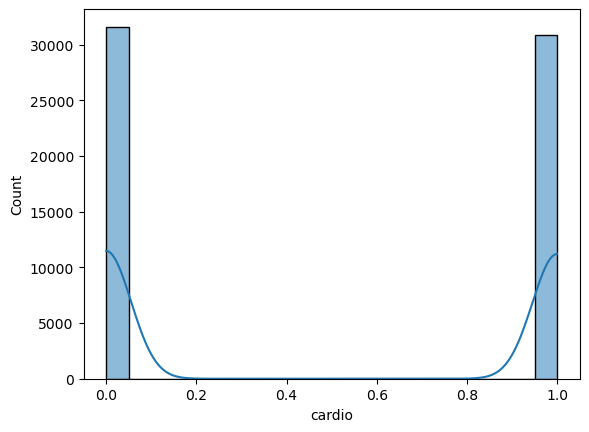

In [47]:
# plotting histogram for the target variable.
sns.histplot(cdata['cardio'],kde=True)

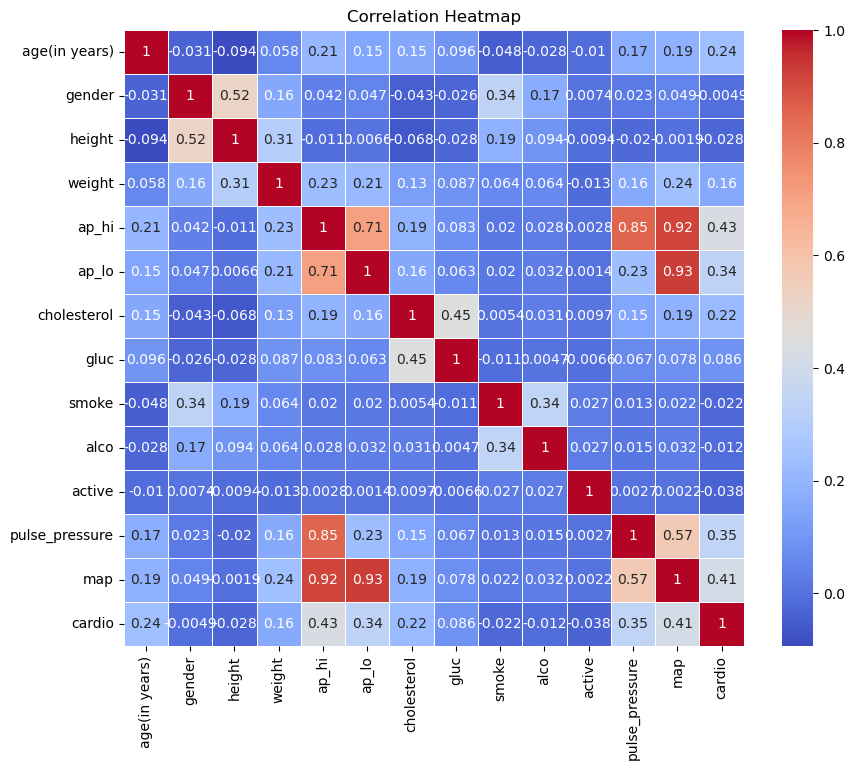

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Specify the target variable and independent variables
target_variable = 'cardio' # Replace with the actual target variable name
independent_variables = ['age(in years)', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active','pulse_pressure', 'map']  # Replace with the actual independent variable names

# Calculate the correlation matrix
correlation_matrix = cdata[independent_variables + [target_variable]].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


In [48]:
# Finding Correlation Between Target and Remaining Variables
cdata.corrwith(cdata['cardio'])

age(in years)     0.236521
gender           -0.004897
height           -0.027661
weight            0.161645
ap_hi             0.432237
ap_lo             0.336297
cholesterol       0.218194
gluc              0.085689
smoke            -0.022224
alco             -0.012360
active           -0.037690
cardio            1.000000
bmi               0.178888
bmi_category      0.078464
pulse_pressure    0.345492
map               0.413800
dtype: float64

In [49]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62478 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age(in years)   62478 non-null  float64
 1   gender          62478 non-null  int64  
 2   height          62478 non-null  float64
 3   weight          62478 non-null  float64
 4   ap_hi           62478 non-null  float64
 5   ap_lo           62478 non-null  float64
 6   cholesterol     62478 non-null  int64  
 7   gluc            62478 non-null  int64  
 8   smoke           62478 non-null  int64  
 9   alco            62478 non-null  int64  
 10  active          62478 non-null  int64  
 11  cardio          62478 non-null  int64  
 12  bmi             62478 non-null  float64
 13  bmi_category    62478 non-null  int32  
 14  pulse_pressure  62478 non-null  float64
 15  map             62478 non-null  float64
dtypes: float64(8), int32(1), int64(7)
memory usage: 9.9 MB


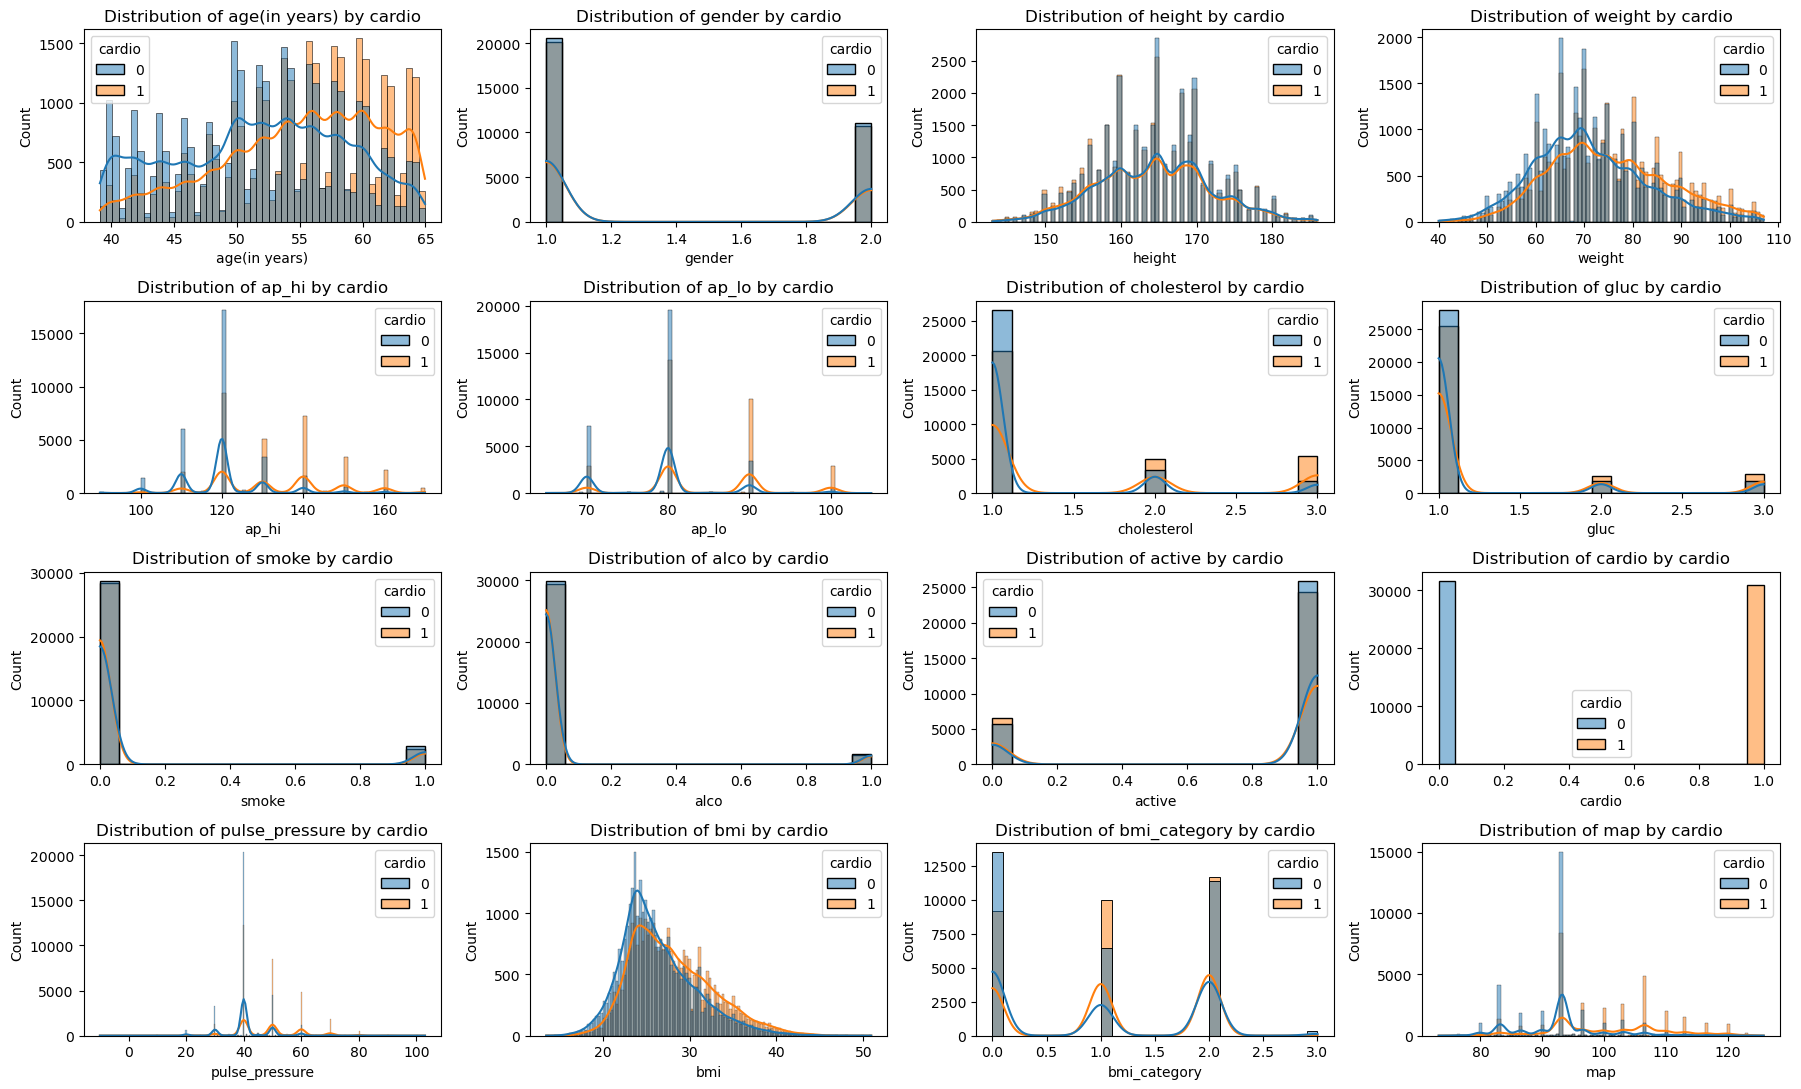

In [51]:
plt.figure(figsize=(18,11))
numerical_columns=['age(in years)','gender','height','weight','ap_hi','ap_lo',
                   'cholesterol','gluc','smoke','alco','active','cardio','pulse_pressure','bmi','bmi_category','map']
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=cdata, x=col, hue='cardio', kde=True)
    plt.title(f'Distribution of {col} by cardio')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [52]:
cols=['age(in years)','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio','pulse_pressure','bmi','bmi_category','map']
bs=cdata[cols]
bs.corr()

,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pulse_pressure,bmi,bmi_category,map
age(in years),1.000000,-0.030821,-0.094207,0.057578,0.205122,0.148135,0.154382,0.096456,-0.047801,-0.028289,-0.010421,0.236521,0.172403,0.111528,0.050992,0.189902
gender,-0.030821,1.000000,0.517331,0.157594,0.042158,0.047252,-0.043494,-0.026000,0.337058,0.168976,0.007378,-0.004897,0.023043,-0.132125,0.010570,0.048520
height,-0.094207,0.517331,1.000000,0.305818,-0.010803,0.006610,-0.068194,-0.028391,0.192081,0.094092,-0.009357,-0.027661,-0.019705,-0.246312,-0.028959,-0.001863
weight,0.057578,0.157594,0.305818,1.000000,0.233061,0.214513,0.125283,0.086690,0.063751,0.063613,-0.013112,0.161645,0.161825,0.843465,0.339795,0.241859
ap_hi,0.205122,0.042158,-0.010803,0.233061,1.000000,0.705617,0.192455,0.082743,0.019937,0.027571,0.002760,0.432237,0.852701,0.242036,0.103331,0.916447
ap_lo,0.148135,0.047252,0.006610,0.214513,0.705617,1.000000,0.155749,0.063088,0.020158,0.031650,0.001416,0.336297,0.231512,0.213383,0.093181,0.930209
cholesterol,0.154382,-0.043494,-0.068194,0.125283,0.192455,0.155749,1.000000,0.450032,0.005371,0.030801,0.009707,0.218194,0.149399,0.164970,0.059307,0.187641
gluc,0.096456,-0.026000,-0.028391,0.086690,0.082743,0.063088,0.450032,1.000000,-0.010568,0.004714,-0.006615,0.085689,0.067087,0.103513,0.029712,0.078486
smoke,-0.047801,0.337058,0.192081,0.063751,0.019937,0.020158,0.005371,-0.010568,1.000000,0.341792,0.027314,-0.022224,0.012511,-0.043116,0.018110,0.021710
alco,-0.028289,0.168976,0.094092,0.063613,0.027571,0.031650,0.030801,0.004714,0.341792,1.000000,0.026877,-0.012360,0.014519,0.011212,0.023917,0.032154


In [54]:
#Step -6
#Check the duplicate  values with in  dataset if available
cdata_dup=cdata[cdata.duplicated(keep='last')]
cdata_dup

,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,pulse_pressure,map


In [55]:
# Display descriptive statistics
cdata.describe()

,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,pulse_pressure,map
count,62478.000000,62478.000000,62478.000000,62478.000000,62478.000000,62478.000000,62478.000000,62478.000000,62478.000000,62478.000000,62478.000000,62478.000000,62478.000000,62478.000000,62478.000000,62478.000000
mean,53.407820,1.348667,164.406063,73.184231,126.422965,81.699958,1.357854,1.220734,0.086382,0.052194,0.804299,0.493982,27.121303,1.021832,44.723006,96.458551
std,6.734855,0.476552,7.532436,12.273270,14.292042,7.674661,0.675297,0.567694,0.280930,0.222421,0.396742,0.499968,4.568086,0.871997,10.410060,9.105462
min,39.128767,1.000000,143.000000,40.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.520822,0.000000,-10.000000,73.250000
25%,48.561644,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,0.000000,40.000000,93.200000
50%,54.021918,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.234568,1.000000,40.000000,93.200000
75%,58.471233,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.760838,2.000000,50.000000,103.200000
max,64.967123,2.000000,186.000000,107.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,50.891795,3.000000,103.000000,125.780000


In [56]:
# Finding Correlation Between Target and Remaining Variables
cdata.corrwith(cdata['cardio'])

age(in years)     0.236521
gender           -0.004897
height           -0.027661
weight            0.161645
ap_hi             0.432237
ap_lo             0.336297
cholesterol       0.218194
gluc              0.085689
smoke            -0.022224
alco             -0.012360
active           -0.037690
cardio            1.000000
bmi               0.178888
bmi_category      0.078464
pulse_pressure    0.345492
map               0.413800
dtype: float64

# Correlation based analysis -0.7 t0 0.7

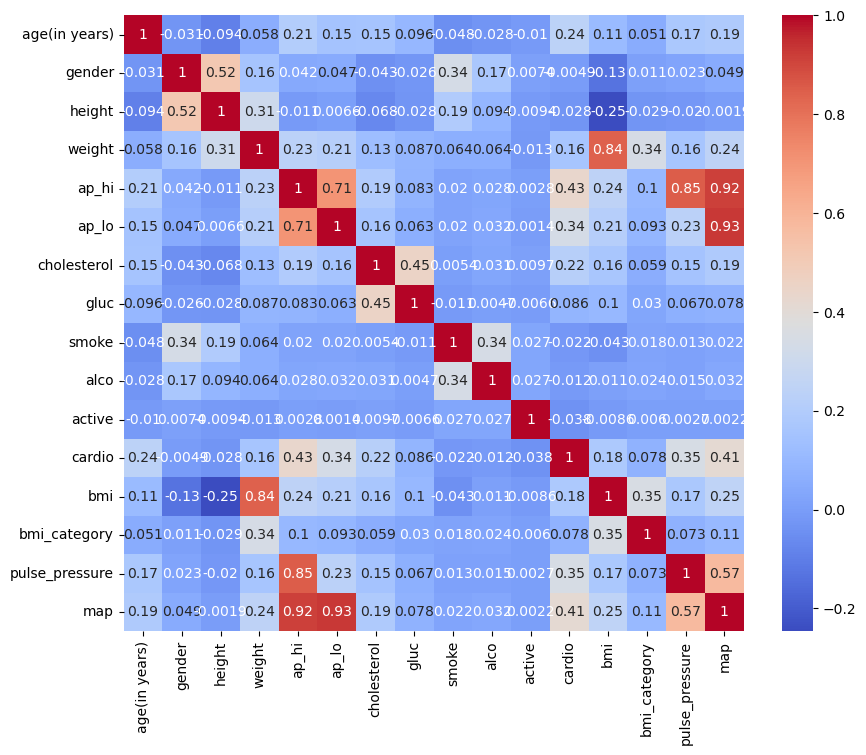

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = cdata.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Define your correlation threshold
threshold = 0.7

# Identify pairs of highly correlated features
correlation_pairs = (corr_matrix.abs() > threshold) & (corr_matrix.abs() < -0.7)

# Drop one of each pair of correlated features
columns_to_drop = set()
for i in range(len(correlation_pairs.columns)):
    for j in range(i):
        if correlation_pairs.iloc[i, j]:
            colname = correlation_pairs.columns[i]
            columns_to_drop.add(colname)

# Drop the identified columns
cdatan = cdata.drop(columns=columns_to_drop)
#from google.colab import files

# Assuming cdatan1 is your new DataFrame after dropping correlated columns
cdatan.to_csv('newdata after EDA.csv', index=False)

# Download the file to your local machine
#files.download('newdata after EDA.csv')


In [58]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62478 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age(in years)   62478 non-null  float64
 1   gender          62478 non-null  int64  
 2   height          62478 non-null  float64
 3   weight          62478 non-null  float64
 4   ap_hi           62478 non-null  float64
 5   ap_lo           62478 non-null  float64
 6   cholesterol     62478 non-null  int64  
 7   gluc            62478 non-null  int64  
 8   smoke           62478 non-null  int64  
 9   alco            62478 non-null  int64  
 10  active          62478 non-null  int64  
 11  cardio          62478 non-null  int64  
 12  bmi             62478 non-null  float64
 13  bmi_category    62478 non-null  int32  
 14  pulse_pressure  62478 non-null  float64
 15  map             62478 non-null  float64
dtypes: float64(8), int32(1), int64(7)
memory usage: 9.9 MB


In [59]:
cdatan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62478 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age(in years)   62478 non-null  float64
 1   gender          62478 non-null  int64  
 2   height          62478 non-null  float64
 3   weight          62478 non-null  float64
 4   ap_hi           62478 non-null  float64
 5   ap_lo           62478 non-null  float64
 6   cholesterol     62478 non-null  int64  
 7   gluc            62478 non-null  int64  
 8   smoke           62478 non-null  int64  
 9   alco            62478 non-null  int64  
 10  active          62478 non-null  int64  
 11  cardio          62478 non-null  int64  
 12  bmi             62478 non-null  float64
 13  bmi_category    62478 non-null  int32  
 14  pulse_pressure  62478 non-null  float64
 15  map             62478 non-null  float64
dtypes: float64(8), int32(1), int64(7)
memory usage: 9.9 MB


In [60]:
#Display the dataset
cdatan.head()

,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,pulse_pressure,map
0,50.391781,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0,21.967120,0,30.0,89.9
1,55.419178,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1,34.927679,1,50.0,106.5
2,51.663014,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1,23.507805,0,60.0,89.8
3,48.282192,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1,28.710479,2,50.0,116.5
5,60.038356,1,151.0,67.0,120.0,80.0,2,2,0,0,0,0,29.384676,2,40.0,93.2


In [61]:
cdatan.columns

Index(['age(in years)', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi',
       'bmi_category', 'pulse_pressure', 'map'],
      dtype='object')

In [62]:
#Identify the variables to normalize with minmaxscalar
cols=['age(in years)','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','bmi','bmi_category','pulse_pressure','map']

In [63]:
#Step -10
# identify the Independent and Target (dependent variables)
IndepVar = []
for col in cdatan.columns:
    if col != 'cardio':
        IndepVar.append(col)
TargetVar = 'cardio'
x = cdatan[IndepVar]
y = cdatan[TargetVar]

In [64]:
# Random oversampling can be implemented using the RandomOverSampler class

#from imblearn.over_sampling import RandomOverSampler

#oversample = RandomOverSampler(sampling_strategy=0.125)

#x_over, y_over = oversample.fit_resample(x, y)

#print(x_over.shape)

#print(y_over.shape)

In [65]:
#Step -11
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 42)

# Display the shape

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((43734, 15), (18744, 15), (43734,), (18744,))

In [66]:
#Step -12
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)


In [67]:
#Load the result file for SVM
SVMResults=pd.read_csv(r"C:\Users\Praveen\OneDrive\Desktop\EMResults.csv",header=0)
#Display the  first five records
SVMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVM- Linear,Poly,Gaussian,Sigmoid Kernel

Confusion matrix (sigmoid kernel): 
 [[3591 5555]
 [6103 3495]]
Outcome values (sigmoid kernel): 
 3591 5555 6103 3495
Classification report (sigmoid kernel): 
               precision    recall  f1-score   support

           1       0.37      0.39      0.38      9146
           0       0.39      0.36      0.37      9598

    accuracy                           0.38     18744
   macro avg       0.38      0.38      0.38     18744
weighted avg       0.38      0.38      0.38     18744

Accuracy (sigmoid kernel): 37.8 %
Precision (sigmoid kernel): 37.0 %
Recall (sigmoid kernel): 39.3 %
F1 Score (sigmoid kernel): 0.381
Specificity or True Negative Rate (sigmoid kernel): 36.4 %
Balanced Accuracy (sigmoid kernel): 37.8 %
MCC (sigmoid kernel): -0.243
roc_auc_score (sigmoid kernel): 0.378


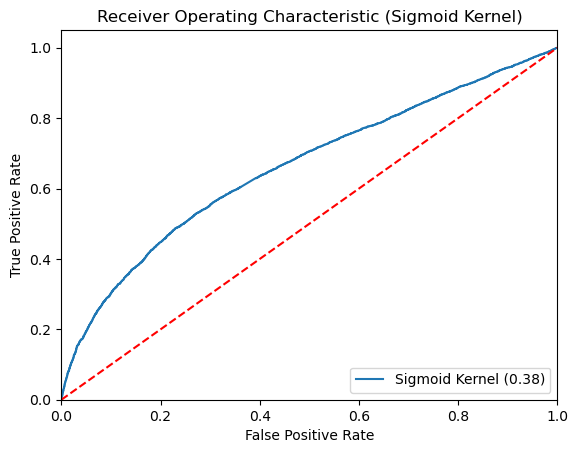

Confusion matrix (poly kernel): 
 [[5592 3554]
 [1578 8020]]
Outcome values (poly kernel): 
 5592 3554 1578 8020
Classification report (poly kernel): 
               precision    recall  f1-score   support

           1       0.78      0.61      0.69      9146
           0       0.69      0.84      0.76      9598

    accuracy                           0.73     18744
   macro avg       0.74      0.72      0.72     18744
weighted avg       0.74      0.73      0.72     18744

Accuracy (poly kernel): 72.6 %
Precision (poly kernel): 78.0 %
Recall (poly kernel): 61.1 %
F1 Score (poly kernel): 0.685
Specificity or True Negative Rate (poly kernel): 83.6 %
Balanced Accuracy (poly kernel): 72.4 %
MCC (poly kernel): 0.46
roc_auc_score (poly kernel): 0.724


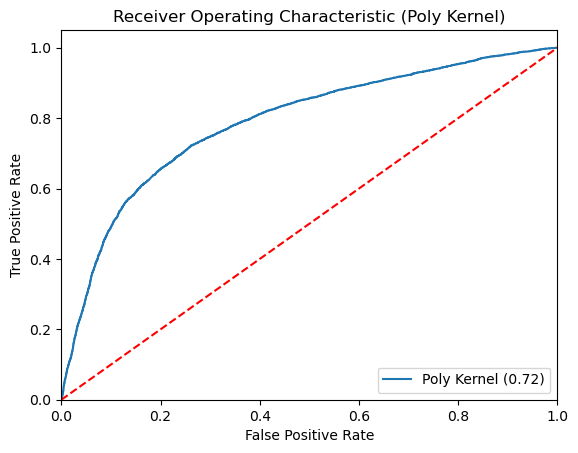

Confusion matrix (rbf kernel): 
 [[5930 3216]
 [1853 7745]]
Outcome values (rbf kernel): 
 5930 3216 1853 7745
Classification report (rbf kernel): 
               precision    recall  f1-score   support

           1       0.76      0.65      0.70      9146
           0       0.71      0.81      0.75      9598

    accuracy                           0.73     18744
   macro avg       0.73      0.73      0.73     18744
weighted avg       0.73      0.73      0.73     18744

Accuracy (rbf kernel): 73.0 %
Precision (rbf kernel): 76.2 %
Recall (rbf kernel): 64.8 %
F1 Score (rbf kernel): 0.701
Specificity or True Negative Rate (rbf kernel): 80.7 %
Balanced Accuracy (rbf kernel): 72.8 %
MCC (rbf kernel): 0.462
roc_auc_score (rbf kernel): 0.728


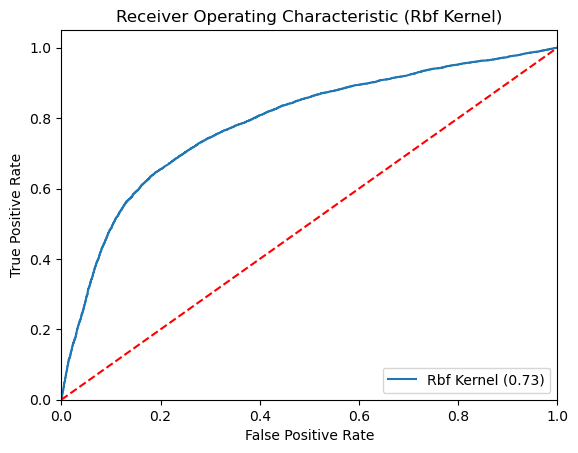

Confusion matrix (linear kernel): 
 [[5626 3520]
 [1676 7922]]
Outcome values (linear kernel): 
 5626 3520 1676 7922
Classification report (linear kernel): 
               precision    recall  f1-score   support

           1       0.77      0.62      0.68      9146
           0       0.69      0.83      0.75      9598

    accuracy                           0.72     18744
   macro avg       0.73      0.72      0.72     18744
weighted avg       0.73      0.72      0.72     18744

Accuracy (linear kernel): 72.3 %
Precision (linear kernel): 77.0 %
Recall (linear kernel): 61.5 %
F1 Score (linear kernel): 0.684
Specificity or True Negative Rate (linear kernel): 82.5 %
Balanced Accuracy (linear kernel): 72.0 %
MCC (linear kernel): 0.452
roc_auc_score (linear kernel): 0.72


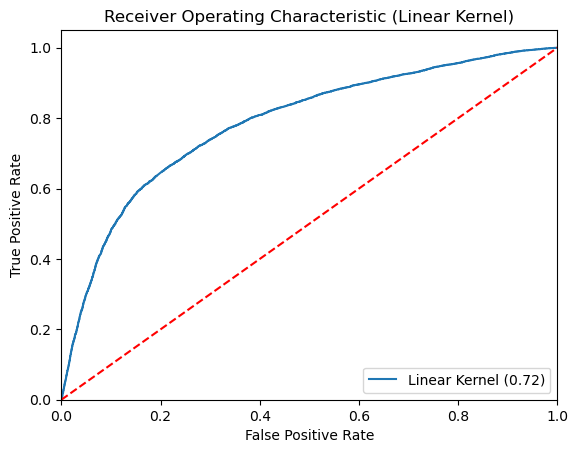

In [68]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

# Assuming SVMResults is a pandas DataFrame initialized before this code
SVMResults = pd.DataFrame(columns=['Model Name', 'True_Positive', 'False_Negative', 'False_Positive',
                                   'True_Negative', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
                                   'Specificity', 'MCC', 'ROC_AUC_Score', 'Balanced Accuracy'])

# List of kernels
kernels = ['sigmoid', 'poly', 'rbf', 'linear']

for kernel in kernels:
    # Creating the SVM model for each kernel
    model = SVC(kernel=kernel, random_state=42, class_weight='balanced', probability=True)

    # Training the model
    model.fit(x_train, y_train)

    # Predictions
    y_pred = model.predict(x_test)
    y_pred_prob = model.predict_proba(x_test)

    # Confusion Matrix
    matrix = confusion_matrix(y_test, y_pred, labels=[1, 0], sample_weight=None, normalize=None)
    print(f'Confusion matrix ({kernel} kernel): \n', matrix)

    # Outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1, 0]).reshape(-1)
    print(f'Outcome values ({kernel} kernel): \n', tp, fn, fp, tn)

    # Classification Report
    c_report = classification_report(y_test, y_pred, labels=[1, 0])
    print(f'Classification report ({kernel} kernel): \n', c_report)

    # Calculating the metrics
    sensitivity = round(tp / (tp + fn), 3)
    specificity = round(tn / (tn + fp), 3)
    accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
    balanced_accuracy = round((sensitivity + specificity) / 2, 3)
    precision = round(tp / (tp + fp), 3)
    f1_score = round((2 * tp / (2 * tp + fp + fn)), 3)

    # Matthews Correlation Coefficient (MCC)
    mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    mcc = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print(f'Accuracy ({kernel} kernel):', round(accuracy * 100, 2), '%')
    print(f'Precision ({kernel} kernel):', round(precision * 100, 2), '%')
    print(f'Recall ({kernel} kernel):', round(sensitivity * 100, 2), '%')
    print(f'F1 Score ({kernel} kernel):', f1_score)
    print(f'Specificity or True Negative Rate ({kernel} kernel):', round(specificity * 100, 2), '%')
    print(f'Balanced Accuracy ({kernel} kernel):', round(balanced_accuracy * 100, 2), '%')
    print(f'MCC ({kernel} kernel):', mcc)

    # Area under ROC curve
    print(f'roc_auc_score ({kernel} kernel):', round(roc_auc_score(y_test, y_pred), 3))

    # ROC Curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'{kernel.capitalize()} Kernel ({logit_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({kernel.capitalize()} Kernel)')
    plt.legend(loc="lower right")
    plt.savefig(f'{kernel.capitalize()}_Log_ROC')
    plt.show()

    # Append results to the DataFrame
    new_row = {'Model Name': f'SVM - {kernel.capitalize()}',
               'True_Positive': tp,
               'False_Negative': fn,
               'False_Positive': fp,
               'True_Negative': tn,
               'Accuracy': accuracy,
               'Precision': precision,
               'Recall': sensitivity,
               'F1 Score': f1_score,
               'Specificity': specificity,
               'MCC': mcc,
               'ROC_AUC_Score': roc_auc_score(y_test, y_pred),
               'Balanced Accuracy': balanced_accuracy}
    SVMResults = SVMResults.append(new_row, ignore_index=True)

#-----------------------------------------------------------------------------------------------------------

In [69]:
#Display the results of SVM Algorithm
SVMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Sigmoid,3591,5555,6103,3495,0.378,0.370,0.393,0.381,0.364,-0.243,0.378385,0.378
1,SVM - Poly,5592,3554,1578,8020,0.726,0.780,0.611,0.685,0.836,0.460,0.723503,0.724
2,SVM - Rbf,5930,3216,1853,7745,0.730,0.762,0.648,0.701,0.807,0.462,0.727655,0.728
3,SVM - Linear,5626,3520,1676,7922,0.723,0.770,0.615,0.684,0.825,0.452,0.720256,0.720


In [70]:
#Load the result file for KNN
KNNResults=pd.read_csv(r"C:\Users\Praveen\OneDrive\Desktop\KNN_Results.csv",header=0)
#Display the  first five records
KNNResults.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN Algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[5787 3359]
 [3381 6217]]
Outcome values : 
 5787 3359 3381 6217
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.63      0.63      9146
           0       0.65      0.65      0.65      9598

    accuracy                           0.64     18744
   macro avg       0.64      0.64      0.64     18744
weighted avg       0.64      0.64      0.64     18744

Accuracy : 64.0 %
Precision : 63.1 %
Recall : 63.3 %
F1 Score : 0.632
Specificity or True Negative Rate : 64.8 %
Balanced Accuracy : 64.1 %
MCC : 0.28
roc_auc_score: 0.64


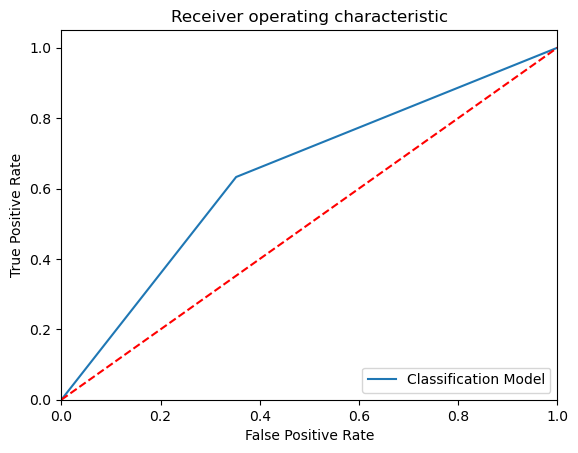

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[4072 5074]
 [1636 7962]]
Outcome values : 
 4072 5074 1636 7962
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.45      0.55      9146
           0       0.61      0.83      0.70      9598

    accuracy                           0.64     18744
   macro avg       0.66      0.64      0.63     18744
weighted avg       0.66      0.64      0.63     18744

Accuracy : 64.2 %
Precision : 71.3 %
Recall : 44.5 %
F1 Score : 0.548
Specificity or True Negative Rate : 83.0 %
Balanced Accuracy : 63.8 %
MCC : 0.298
roc_auc_score: 0.637


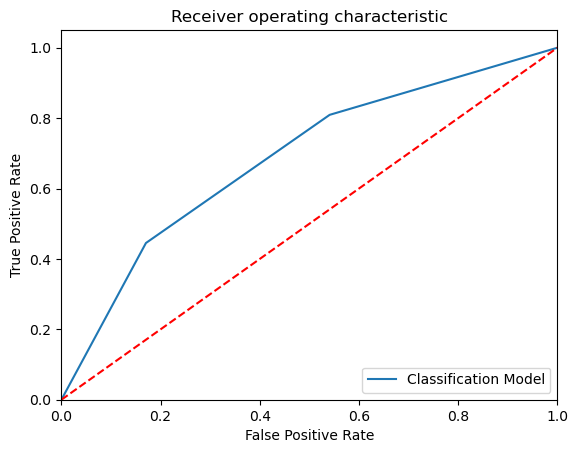

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[6016 3130]
 [2986 6612]]
Outcome values : 
 6016 3130 2986 6612
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.66      0.66      9146
           0       0.68      0.69      0.68      9598

    accuracy                           0.67     18744
   macro avg       0.67      0.67      0.67     18744
weighted avg       0.67      0.67      0.67     18744

Accuracy : 67.4 %
Precision : 66.8 %
Recall : 65.8 %
F1 Score : 0.663
Specificity or True Negative Rate : 68.9 %
Balanced Accuracy : 67.4 %
MCC : 0.347
roc_auc_score: 0.673


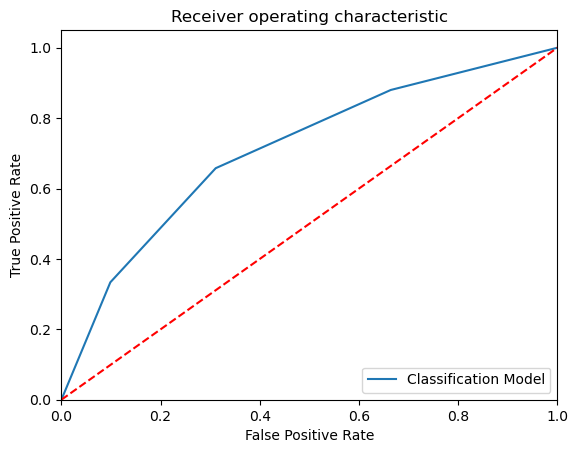

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[4978 4168]
 [1929 7669]]
Outcome values : 
 4978 4168 1929 7669
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.54      0.62      9146
           0       0.65      0.80      0.72      9598

    accuracy                           0.67     18744
   macro avg       0.68      0.67      0.67     18744
weighted avg       0.68      0.67      0.67     18744

Accuracy : 67.5 %
Precision : 72.1 %
Recall : 54.4 %
F1 Score : 0.62
Specificity or True Negative Rate : 79.9 %
Balanced Accuracy : 67.2 %
MCC : 0.356
roc_auc_score: 0.672


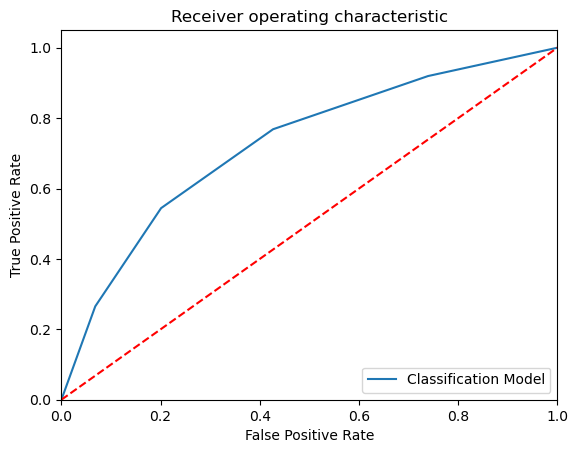

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[6136 3010]
 [2776 6822]]
Outcome values : 
 6136 3010 2776 6822
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.67      0.68      9146
           0       0.69      0.71      0.70      9598

    accuracy                           0.69     18744
   macro avg       0.69      0.69      0.69     18744
weighted avg       0.69      0.69      0.69     18744

Accuracy : 69.1 %
Precision : 68.9 %
Recall : 67.1 %
F1 Score : 0.68
Specificity or True Negative Rate : 71.1 %
Balanced Accuracy : 69.1 %
MCC : 0.382
roc_auc_score: 0.691


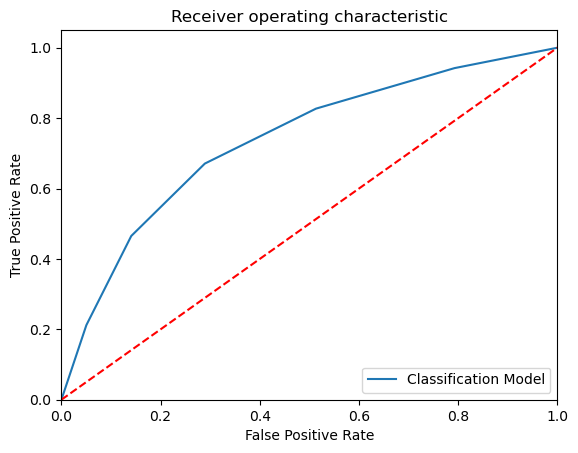

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[5383 3763]
 [1988 7610]]
Outcome values : 
 5383 3763 1988 7610
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.59      0.65      9146
           0       0.67      0.79      0.73      9598

    accuracy                           0.69     18744
   macro avg       0.70      0.69      0.69     18744
weighted avg       0.70      0.69      0.69     18744

Accuracy : 69.3 %
Precision : 73.0 %
Recall : 58.9 %
F1 Score : 0.652
Specificity or True Negative Rate : 79.3 %
Balanced Accuracy : 69.1 %
MCC : 0.39
roc_auc_score: 0.691


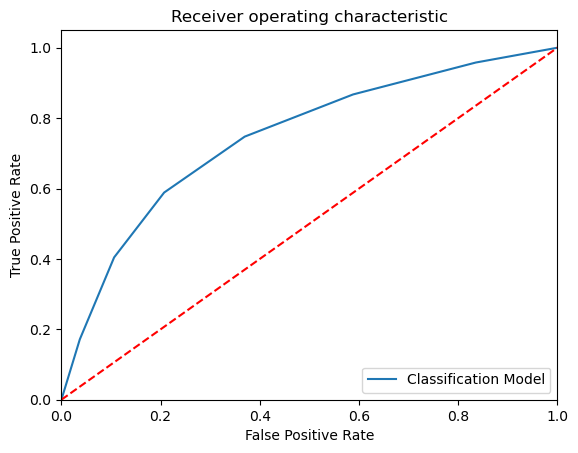

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[6136 3010]
 [2646 6952]]
Outcome values : 
 6136 3010 2646 6952
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.67      0.68      9146
           0       0.70      0.72      0.71      9598

    accuracy                           0.70     18744
   macro avg       0.70      0.70      0.70     18744
weighted avg       0.70      0.70      0.70     18744

Accuracy : 69.8 %
Precision : 69.9 %
Recall : 67.1 %
F1 Score : 0.685
Specificity or True Negative Rate : 72.4 %
Balanced Accuracy : 69.8 %
MCC : 0.396
roc_auc_score: 0.698


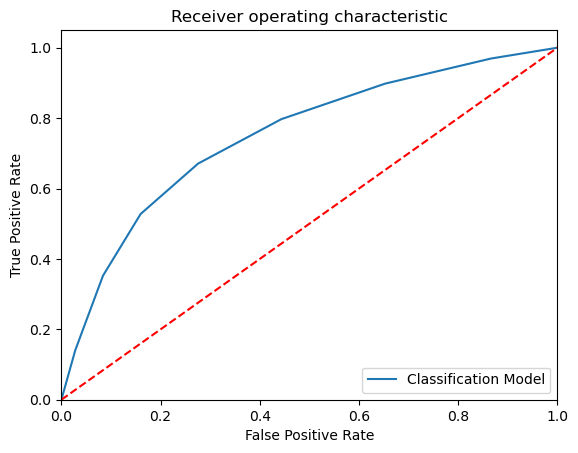

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[5633 3513]
 [2032 7566]]
Outcome values : 
 5633 3513 2032 7566
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.62      0.67      9146
           0       0.68      0.79      0.73      9598

    accuracy                           0.70     18744
   macro avg       0.71      0.70      0.70     18744
weighted avg       0.71      0.70      0.70     18744

Accuracy : 70.4 %
Precision : 73.5 %
Recall : 61.6 %
F1 Score : 0.67
Specificity or True Negative Rate : 78.8 %
Balanced Accuracy : 70.2 %
MCC : 0.411
roc_auc_score: 0.702


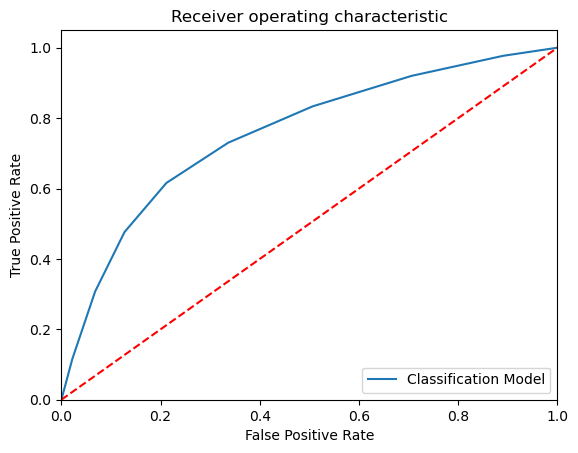

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[6196 2950]
 [2555 7043]]
Outcome values : 
 6196 2950 2555 7043
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.68      0.69      9146
           0       0.70      0.73      0.72      9598

    accuracy                           0.71     18744
   macro avg       0.71      0.71      0.71     18744
weighted avg       0.71      0.71      0.71     18744

Accuracy : 70.6 %
Precision : 70.8 %
Recall : 67.7 %
F1 Score : 0.692
Specificity or True Negative Rate : 73.4 %
Balanced Accuracy : 70.6 %
MCC : 0.412
roc_auc_score: 0.706


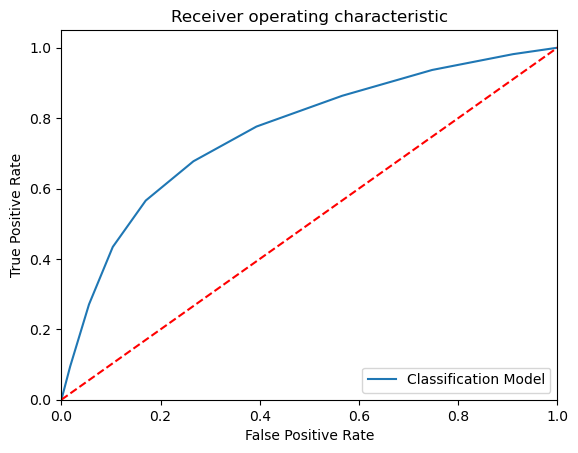

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[5759 3387]
 [2069 7529]]
Outcome values : 
 5759 3387 2069 7529
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.63      0.68      9146
           0       0.69      0.78      0.73      9598

    accuracy                           0.71     18744
   macro avg       0.71      0.71      0.71     18744
weighted avg       0.71      0.71      0.71     18744

Accuracy : 70.9 %
Precision : 73.6 %
Recall : 63.0 %
F1 Score : 0.679
Specificity or True Negative Rate : 78.4 %
Balanced Accuracy : 70.7 %
MCC : 0.42
roc_auc_score: 0.707


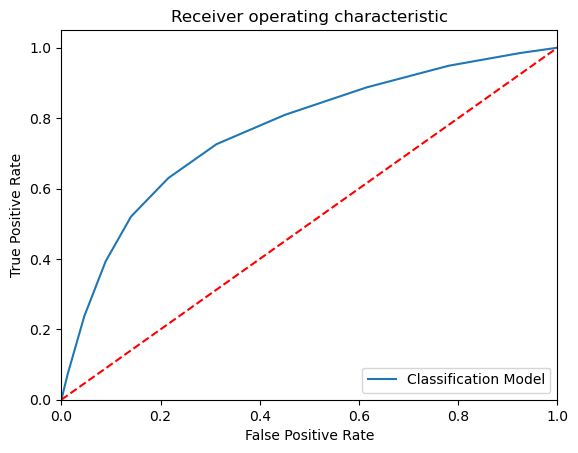

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[6228 2918]
 [2470 7128]]
Outcome values : 
 6228 2918 2470 7128
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.68      0.70      9146
           0       0.71      0.74      0.73      9598

    accuracy                           0.71     18744
   macro avg       0.71      0.71      0.71     18744
weighted avg       0.71      0.71      0.71     18744

Accuracy : 71.3 %
Precision : 71.6 %
Recall : 68.1 %
F1 Score : 0.698
Specificity or True Negative Rate : 74.3 %
Balanced Accuracy : 71.2 %
MCC : 0.425
roc_auc_score: 0.712


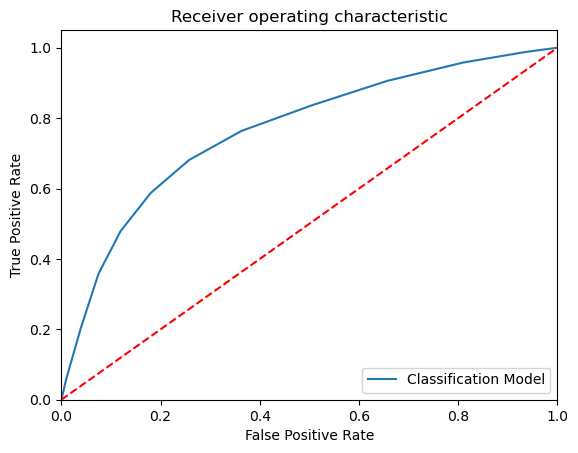

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[5855 3291]
 [2071 7527]]
Outcome values : 
 5855 3291 2071 7527
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.64      0.69      9146
           0       0.70      0.78      0.74      9598

    accuracy                           0.71     18744
   macro avg       0.72      0.71      0.71     18744
weighted avg       0.72      0.71      0.71     18744

Accuracy : 71.4 %
Precision : 73.9 %
Recall : 64.0 %
F1 Score : 0.686
Specificity or True Negative Rate : 78.4 %
Balanced Accuracy : 71.2 %
MCC : 0.429
roc_auc_score: 0.712


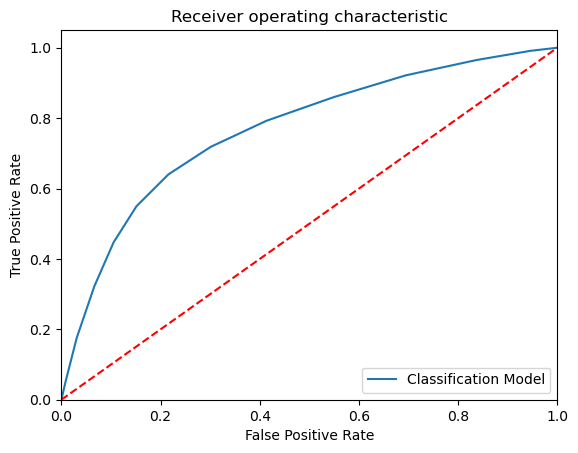

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[6212 2934]
 [2421 7177]]
Outcome values : 
 6212 2934 2421 7177
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.68      0.70      9146
           0       0.71      0.75      0.73      9598

    accuracy                           0.71     18744
   macro avg       0.71      0.71      0.71     18744
weighted avg       0.71      0.71      0.71     18744

Accuracy : 71.4 %
Precision : 72.0 %
Recall : 67.9 %
F1 Score : 0.699
Specificity or True Negative Rate : 74.8 %
Balanced Accuracy : 71.4 %
MCC : 0.428
roc_auc_score: 0.713


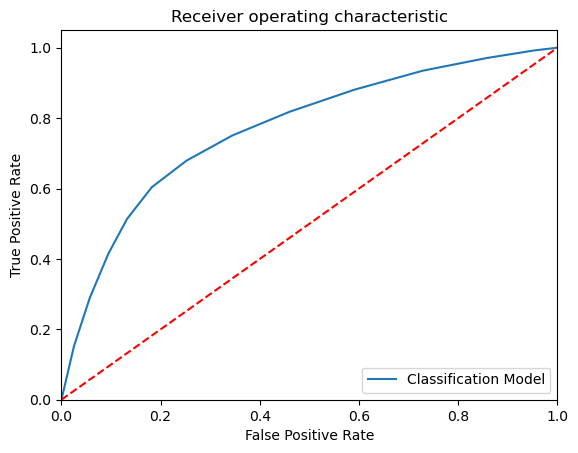

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[5880 3266]
 [2047 7551]]
Outcome values : 
 5880 3266 2047 7551
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.64      0.69      9146
           0       0.70      0.79      0.74      9598

    accuracy                           0.72     18744
   macro avg       0.72      0.71      0.71     18744
weighted avg       0.72      0.72      0.71     18744

Accuracy : 71.7 %
Precision : 74.2 %
Recall : 64.3 %
F1 Score : 0.689
Specificity or True Negative Rate : 78.7 %
Balanced Accuracy : 71.5 %
MCC : 0.435
roc_auc_score: 0.715


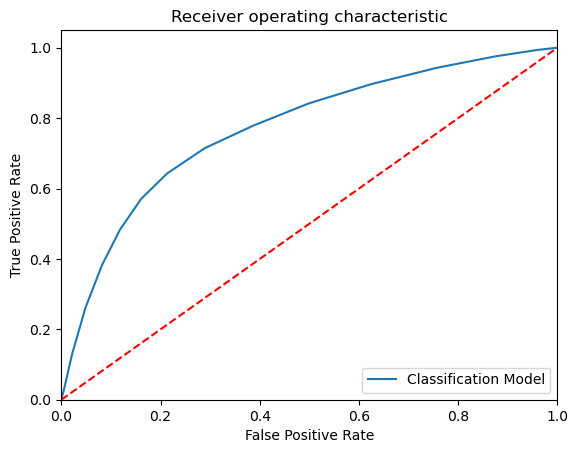

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[6192 2954]
 [2355 7243]]
Outcome values : 
 6192 2954 2355 7243
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.68      0.70      9146
           0       0.71      0.75      0.73      9598

    accuracy                           0.72     18744
   macro avg       0.72      0.72      0.72     18744
weighted avg       0.72      0.72      0.72     18744

Accuracy : 71.7 %
Precision : 72.4 %
Recall : 67.7 %
F1 Score : 0.7
Specificity or True Negative Rate : 75.5 %
Balanced Accuracy : 71.6 %
MCC : 0.433
roc_auc_score: 0.716


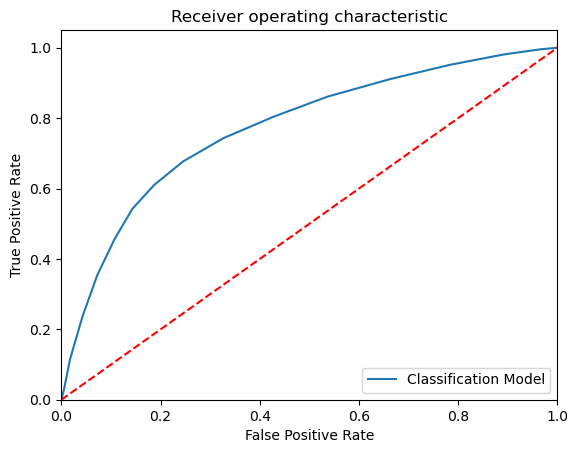

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[5910 3236]
 [2061 7537]]
Outcome values : 
 5910 3236 2061 7537
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.65      0.69      9146
           0       0.70      0.79      0.74      9598

    accuracy                           0.72     18744
   macro avg       0.72      0.72      0.72     18744
weighted avg       0.72      0.72      0.72     18744

Accuracy : 71.7 %
Precision : 74.1 %
Recall : 64.6 %
F1 Score : 0.691
Specificity or True Negative Rate : 78.5 %
Balanced Accuracy : 71.6 %
MCC : 0.436
roc_auc_score: 0.716


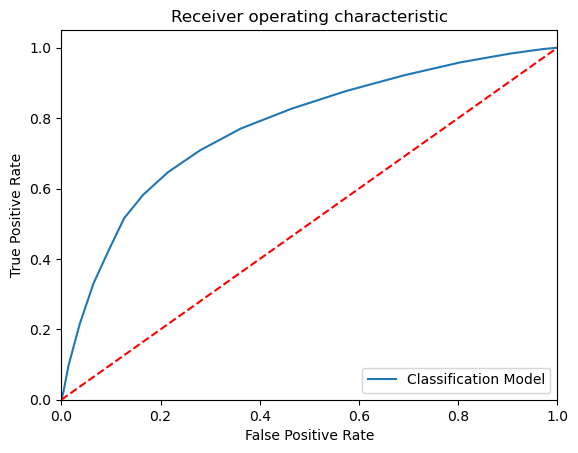

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[6164 2982]
 [2334 7264]]
Outcome values : 
 6164 2982 2334 7264
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.67      0.70      9146
           0       0.71      0.76      0.73      9598

    accuracy                           0.72     18744
   macro avg       0.72      0.72      0.72     18744
weighted avg       0.72      0.72      0.72     18744

Accuracy : 71.6 %
Precision : 72.5 %
Recall : 67.4 %
F1 Score : 0.699
Specificity or True Negative Rate : 75.7 %
Balanced Accuracy : 71.6 %
MCC : 0.433
roc_auc_score: 0.715


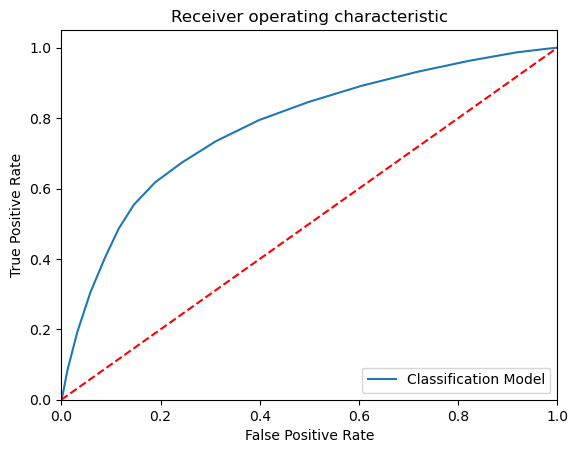

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[5916 3230]
 [2053 7545]]
Outcome values : 
 5916 3230 2053 7545
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.65      0.69      9146
           0       0.70      0.79      0.74      9598

    accuracy                           0.72     18744
   macro avg       0.72      0.72      0.72     18744
weighted avg       0.72      0.72      0.72     18744

Accuracy : 71.8 %
Precision : 74.2 %
Recall : 64.7 %
F1 Score : 0.691
Specificity or True Negative Rate : 78.6 %
Balanced Accuracy : 71.6 %
MCC : 0.438
roc_auc_score: 0.716


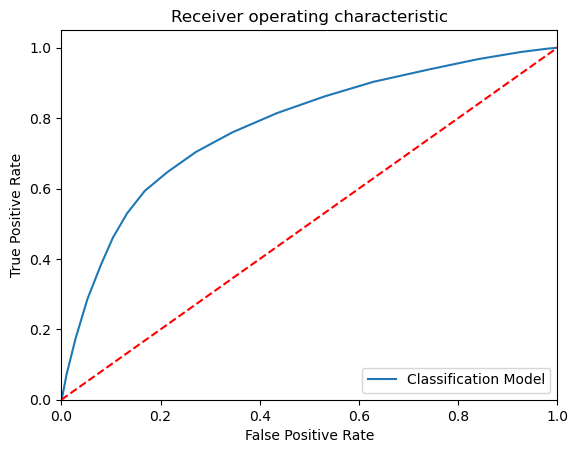

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[6179 2967]
 [2297 7301]]
Outcome values : 
 6179 2967 2297 7301
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.68      0.70      9146
           0       0.71      0.76      0.74      9598

    accuracy                           0.72     18744
   macro avg       0.72      0.72      0.72     18744
weighted avg       0.72      0.72      0.72     18744

Accuracy : 71.9 %
Precision : 72.9 %
Recall : 67.6 %
F1 Score : 0.701
Specificity or True Negative Rate : 76.1 %
Balanced Accuracy : 71.8 %
MCC : 0.438
roc_auc_score: 0.718


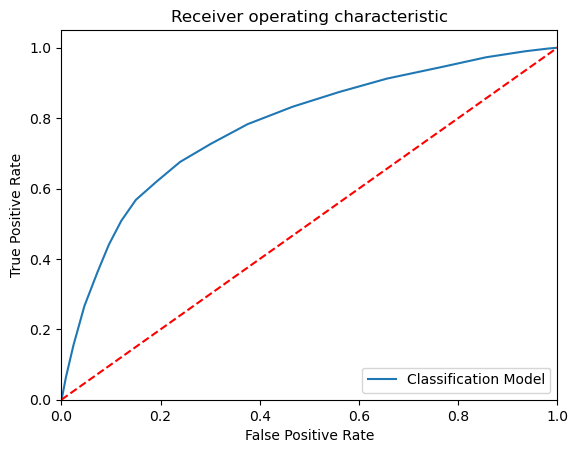

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[5924 3222]
 [2061 7537]]
Outcome values : 
 5924 3222 2061 7537
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.65      0.69      9146
           0       0.70      0.79      0.74      9598

    accuracy                           0.72     18744
   macro avg       0.72      0.72      0.72     18744
weighted avg       0.72      0.72      0.72     18744

Accuracy : 71.8 %
Precision : 74.2 %
Recall : 64.8 %
F1 Score : 0.692
Specificity or True Negative Rate : 78.5 %
Balanced Accuracy : 71.6 %
MCC : 0.438
roc_auc_score: 0.716


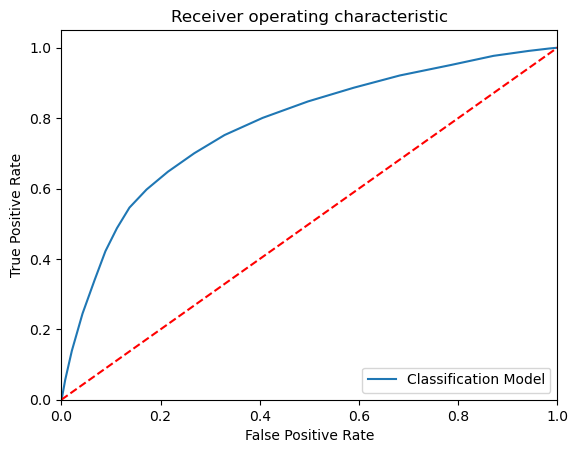

In [71]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):

    k = a

    # Build the model

    ModelKNN = KNeighborsClassifier(n_neighbors=k)

    # Train the model

    ModelKNN.fit(x_train, y_train)

    # Predict the model

    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)

    print('KNN_K_value = ', a)

    # Print the model name

    print('Model Name: ', ModelKNN)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNNResults = KNNResults.append(new_row, ignore_index=True)

In [72]:
#Display the results of KNN Algorithm
KNNResults

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,5787,3359,3381,6217,0.640,0.631,0.633,0.632,0.648,0.280,0.640237,0.641
1,KNeighborsClassifier(n_neighbors=2),2,4072,5074,1636,7962,0.642,0.713,0.445,0.548,0.830,0.298,0.637385,0.638
2,KNeighborsClassifier(n_neighbors=3),3,6016,3130,2986,6612,0.674,0.668,0.658,0.663,0.689,0.347,0.673334,0.674
3,KNeighborsClassifier(n_neighbors=4),4,4978,4168,1929,7669,0.675,0.721,0.544,0.620,0.799,0.356,0.671651,0.672
4,KNeighborsClassifier(),5,6136,3010,2776,6822,0.691,0.689,0.671,0.680,0.711,0.382,0.690834,0.691
5,KNeighborsClassifier(n_neighbors=6),6,5383,3763,1988,7610,0.693,0.730,0.589,0.652,0.793,0.390,0.690718,0.691
6,KNeighborsClassifier(n_neighbors=7),7,6136,3010,2646,6952,0.698,0.699,0.671,0.685,0.724,0.396,0.697606,0.698
7,KNeighborsClassifier(n_neighbors=8),8,5633,3513,2032,7566,0.704,0.735,0.616,0.670,0.788,0.411,0.702093,0.702
8,KNeighborsClassifier(n_neighbors=9),9,6196,2950,2555,7043,0.706,0.708,0.677,0.692,0.734,0.412,0.705627,0.706
9,KNeighborsClassifier(n_neighbors=10),10,5759,3387,2069,7529,0.709,0.736,0.630,0.679,0.784,0.420,0.707054,0.707


# Compare the classification Algorithms

In [ ]:
# Load the results file for classification
EMResults = pd.read_csv(r"C:\Users\Praveen\OneDrive\Desktop\EMResults.csv",header=0)
EMResults.head()

In [ ]:
!pip install catboost

In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, matthews_corrcoef,
                             jaccard_score, log_loss, cohen_kappa_score,
                             average_precision_score, brier_score_loss,
                             fowlkes_mallows_score, balanced_accuracy_score)
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from math import sqrt

# Assuming you have x_train, x_test, y_train, y_test defined
# Replace them with your actual data

# Create objects of classification algorithms with default hyperparameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=19)
ModelGNB = GaussianNB()
ModelSVM = SVC(kernel='rbf', random_state=42, class_weight='balanced', probability=True)
ModelLGBM = LGBMClassifier()
ModelCatBoost = CatBoostClassifier()
ModelXGB = XGBClassifier()

# Add all models to the list
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, ModelLGBM, ModelCatBoost, ModelXGB]

results = []

for model in MM:
    # Train the model on the training dataset
    model.fit(x_train, y_train)

    # Make predictions on the test dataset
    y_pred = model.predict(x_test)
    y_pred_prob = model.predict_proba(x_test)

    # Calculate the additional metrics
    accuracy_final = model.score(x_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_prob)
    kappa = cohen_kappa_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)
    brier_loss = brier_score_loss(y_test, y_pred)
    fowlkes_mallows = fowlkes_mallows_score(y_test, y_pred)
    gini_coefficient = 2 * roc_auc - 1
    bcr = (recall + specificity) / 2

    # Confusion matrix in sklearn
    matrix = confusion_matrix(y_test, y_pred, labels=[1, 0], sample_weight=None, normalize=None)

    # Outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1, 0]).reshape(-1)

    # Calculating the metrics
    sensitivity = round(tp / (tp + fn), 3)
    specificity = round(tn / (tn + fp), 3)
    accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
    balanced_accuracy = round((sensitivity + specificity) / 2, 3)
    precision = round(tp / (tp + fp), 3)
    f1Score = round((2 * tp / (2 * tp + fp + fn)), 3)

    # Matthews Correlation Coefficient (MCC)
    mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    # Append results to the list
    results.append({
        'Model Name': type(model).__name__,
        'Accuracy': accuracy_final,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Specificity': specificity,
        'Balanced Accuracy': balanced_accuracy,
        'MCC': mcc,
        'ROC AUC': roc_auc,
        'Jaccard Index': jaccard,
        'Logloss': logloss,
        'Cohen\'s Kappa': kappa,
        'Average Precision': average_precision,
        'Brier Loss': brier_loss,
        'Fowlkes-Mallows Index': fowlkes_mallows,
        'Gini Coefficient': gini_coefficient,
        'Balanced Classification Rate (BCR)': bcr
    })

# Create a DataFrame from the results list
CA_result = pd.DataFrame(results)

# Save results to CSV file
CA_result.to_csv('BasicMLresults.csv', index=False)


from google.colab import files
# Download the file to your local machine
#files.download('BasicMLresults.csv')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 21717, number of negative: 22017
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 43734, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496570 -> initscore=-0.013720
[LightGBM] [Info] Start training from score -0.013720
Learning rate set to 0.051709
0:	learn: 0.6789714	total: 168ms	remaining: 2m 48s
1:	learn: 0.6666251	total: 185ms	remaining: 1m 32s
2:	learn: 0.6552288	total: 197ms	remaining: 1m 5s
3:	learn: 0.6446567	total: 208ms	remaining: 51.7s
4:	learn: 0.6355539	total: 219ms	remaining: 43.6s
5:	learn: 0.6273637	total: 229ms	remaining: 38s
6:	learn: 0.6197894	total: 240ms	

149:	learn: 0.5391815	total: 2.06s	remaining: 11.7s
150:	learn: 0.5391042	total: 2.08s	remaining: 11.7s
151:	learn: 0.5390589	total: 2.1s	remaining: 11.7s
152:	learn: 0.5389586	total: 2.11s	remaining: 11.7s
153:	learn: 0.5389020	total: 2.13s	remaining: 11.7s
154:	learn: 0.5388829	total: 2.14s	remaining: 11.7s
155:	learn: 0.5387953	total: 2.15s	remaining: 11.6s
156:	learn: 0.5387577	total: 2.17s	remaining: 11.6s
157:	learn: 0.5387015	total: 2.18s	remaining: 11.6s
158:	learn: 0.5386297	total: 2.2s	remaining: 11.6s
159:	learn: 0.5385723	total: 2.22s	remaining: 11.6s
160:	learn: 0.5385176	total: 2.23s	remaining: 11.6s
161:	learn: 0.5384711	total: 2.25s	remaining: 11.6s
162:	learn: 0.5384112	total: 2.26s	remaining: 11.6s
163:	learn: 0.5383753	total: 2.27s	remaining: 11.6s
164:	learn: 0.5383318	total: 2.29s	remaining: 11.6s
165:	learn: 0.5382480	total: 2.31s	remaining: 11.6s
166:	learn: 0.5382081	total: 2.32s	remaining: 11.6s
167:	learn: 0.5381457	total: 2.33s	remaining: 11.6s
168:	learn: 0.

320:	learn: 0.5304638	total: 4.61s	remaining: 9.76s
321:	learn: 0.5304290	total: 4.63s	remaining: 9.75s
322:	learn: 0.5303613	total: 4.64s	remaining: 9.73s
323:	learn: 0.5303041	total: 4.66s	remaining: 9.72s
324:	learn: 0.5302522	total: 4.67s	remaining: 9.71s
325:	learn: 0.5302008	total: 4.69s	remaining: 9.7s
326:	learn: 0.5301976	total: 4.71s	remaining: 9.69s
327:	learn: 0.5301578	total: 4.72s	remaining: 9.68s
328:	learn: 0.5301567	total: 4.74s	remaining: 9.66s
329:	learn: 0.5301095	total: 4.75s	remaining: 9.65s
330:	learn: 0.5300751	total: 4.77s	remaining: 9.63s
331:	learn: 0.5300271	total: 4.78s	remaining: 9.62s
332:	learn: 0.5299717	total: 4.79s	remaining: 9.6s
333:	learn: 0.5299067	total: 4.81s	remaining: 9.59s
334:	learn: 0.5298767	total: 4.82s	remaining: 9.58s
335:	learn: 0.5298761	total: 4.84s	remaining: 9.56s
336:	learn: 0.5298095	total: 4.85s	remaining: 9.54s
337:	learn: 0.5297735	total: 4.86s	remaining: 9.53s
338:	learn: 0.5297099	total: 4.88s	remaining: 9.52s
339:	learn: 0.

493:	learn: 0.5222529	total: 7.14s	remaining: 7.32s
494:	learn: 0.5222134	total: 7.16s	remaining: 7.3s
495:	learn: 0.5221812	total: 7.17s	remaining: 7.29s
496:	learn: 0.5221205	total: 7.18s	remaining: 7.27s
497:	learn: 0.5220754	total: 7.2s	remaining: 7.25s
498:	learn: 0.5220322	total: 7.21s	remaining: 7.24s
499:	learn: 0.5220043	total: 7.23s	remaining: 7.23s
500:	learn: 0.5219602	total: 7.24s	remaining: 7.21s
501:	learn: 0.5219261	total: 7.25s	remaining: 7.2s
502:	learn: 0.5218694	total: 7.27s	remaining: 7.18s
503:	learn: 0.5218260	total: 7.28s	remaining: 7.17s
504:	learn: 0.5217837	total: 7.3s	remaining: 7.16s
505:	learn: 0.5217124	total: 7.32s	remaining: 7.14s
506:	learn: 0.5216764	total: 7.33s	remaining: 7.13s
507:	learn: 0.5216462	total: 7.35s	remaining: 7.11s
508:	learn: 0.5216118	total: 7.36s	remaining: 7.1s
509:	learn: 0.5215918	total: 7.38s	remaining: 7.09s
510:	learn: 0.5215293	total: 7.39s	remaining: 7.07s
511:	learn: 0.5214854	total: 7.41s	remaining: 7.06s
512:	learn: 0.521

655:	learn: 0.5157327	total: 9.49s	remaining: 4.98s
656:	learn: 0.5157016	total: 9.5s	remaining: 4.96s
657:	learn: 0.5156781	total: 9.52s	remaining: 4.95s
658:	learn: 0.5156236	total: 9.53s	remaining: 4.93s
659:	learn: 0.5155897	total: 9.54s	remaining: 4.92s
660:	learn: 0.5155546	total: 9.56s	remaining: 4.9s
661:	learn: 0.5155164	total: 9.57s	remaining: 4.89s
662:	learn: 0.5154604	total: 9.59s	remaining: 4.87s
663:	learn: 0.5154280	total: 9.6s	remaining: 4.86s
664:	learn: 0.5154071	total: 9.61s	remaining: 4.84s
665:	learn: 0.5153473	total: 9.63s	remaining: 4.83s
666:	learn: 0.5153014	total: 9.64s	remaining: 4.81s
667:	learn: 0.5152822	total: 9.65s	remaining: 4.8s
668:	learn: 0.5152694	total: 9.67s	remaining: 4.78s
669:	learn: 0.5152243	total: 9.68s	remaining: 4.77s
670:	learn: 0.5151753	total: 9.7s	remaining: 4.75s
671:	learn: 0.5151501	total: 9.71s	remaining: 4.74s
672:	learn: 0.5150780	total: 9.72s	remaining: 4.72s
673:	learn: 0.5150498	total: 9.74s	remaining: 4.71s
674:	learn: 0.515

825:	learn: 0.5089281	total: 11.8s	remaining: 2.49s
826:	learn: 0.5089024	total: 11.9s	remaining: 2.48s
827:	learn: 0.5088719	total: 11.9s	remaining: 2.46s
828:	learn: 0.5088337	total: 11.9s	remaining: 2.45s
829:	learn: 0.5088032	total: 11.9s	remaining: 2.44s
830:	learn: 0.5087664	total: 11.9s	remaining: 2.42s
831:	learn: 0.5087260	total: 11.9s	remaining: 2.41s
832:	learn: 0.5086781	total: 11.9s	remaining: 2.39s
833:	learn: 0.5086291	total: 11.9s	remaining: 2.38s
834:	learn: 0.5085763	total: 12s	remaining: 2.36s
835:	learn: 0.5085308	total: 12s	remaining: 2.35s
836:	learn: 0.5084930	total: 12s	remaining: 2.33s
837:	learn: 0.5084348	total: 12s	remaining: 2.32s
838:	learn: 0.5083980	total: 12s	remaining: 2.31s
839:	learn: 0.5083552	total: 12s	remaining: 2.29s
840:	learn: 0.5083189	total: 12.1s	remaining: 2.28s
841:	learn: 0.5082633	total: 12.1s	remaining: 2.26s
842:	learn: 0.5082200	total: 12.1s	remaining: 2.25s
843:	learn: 0.5081740	total: 12.1s	remaining: 2.23s
844:	learn: 0.5081185	to

993:	learn: 0.5025359	total: 14.2s	remaining: 85.7ms
994:	learn: 0.5025000	total: 14.2s	remaining: 71.5ms
995:	learn: 0.5024701	total: 14.2s	remaining: 57.2ms
996:	learn: 0.5024686	total: 14.2s	remaining: 42.9ms
997:	learn: 0.5024512	total: 14.3s	remaining: 28.6ms
998:	learn: 0.5024185	total: 14.3s	remaining: 14.3ms
999:	learn: 0.5023882	total: 14.3s	remaining: 0us


ModuleNotFoundError: No module named 'google.colab'

In [74]:
CA_result

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,Balanced Accuracy,MCC,ROC AUC,Jaccard Index,Logloss,Cohen's Kappa,Average Precision,Brier Loss,Fowlkes-Mallows Index,Gini Coefficient,Balanced Classification Rate (BCR)
0,LogisticRegression,0.723805,0.753,0.645528,0.695202,0.798,0.722,0.449853,0.721962,0.532804,0.559849,0.445422,0.659146,0.276195,0.605578,0.443924,0.721962
1,DecisionTreeClassifier,0.616944,0.608,0.603761,0.606014,0.630,0.617,0.233314,0.616634,0.434735,13.801114,0.233308,0.560600,0.383056,0.527671,0.233267,0.616634
2,RandomForestClassifier,0.716336,0.730,0.664990,0.695841,0.765,0.715,0.432786,0.715127,0.533556,0.577322,0.431154,0.648705,0.283664,0.596159,0.430254,0.715127
3,ExtraTreesClassifier,0.706199,0.717,0.656790,0.685691,0.753,0.705,0.412292,0.705036,0.521713,0.601576,0.410887,0.638552,0.293801,0.587455,0.410072,0.705036
4,KNeighborsClassifier,0.719163,0.729,0.675596,0.701282,0.761,0.718,0.438155,0.718138,0.539981,0.647511,0.437029,0.650800,0.280837,0.597982,0.436275,0.718138
5,GaussianNB,0.719270,0.765,0.612836,0.680549,0.821,0.717,0.444114,0.716764,0.515782,1.013355,0.435569,0.657785,0.280730,0.605789,0.433528,0.716764
6,SVC,0.729567,0.762,0.648371,0.700573,0.807,0.728,0.461864,0.727655,0.539140,0.558089,0.456913,0.665580,0.270433,0.611123,0.455310,0.727655
7,LGBMClassifier,0.731114,0.755,0.663897,0.706704,0.795,0.730,0.463650,0.729531,0.546436,0.546492,0.460376,0.665515,0.268886,0.610870,0.459062,0.729531
8,CatBoostClassifier,0.729620,0.756,0.658102,0.703730,0.798,0.728,0.461002,0.727936,0.542888,0.547837,0.457268,0.664454,0.270380,0.609986,0.455872,0.727936
9,XGBClassifier,0.724605,0.741,0.670129,0.703674,0.777,0.724,0.449611,0.723322,0.542822,0.563214,0.447650,0.657359,0.275395,0.603701,0.446645,0.723322
